In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from cdlib import algorithms, viz, evaluation
# import tensorflow as tf

In [2]:
with open('../../GCN/pkl/pred_list.pkl', 'rb') as f:
    pred_list= pickle.load(f) 

In [3]:
len(pred_list)

21

In [4]:
def pred_list_to_adj(pred, country_num=25):
    adj = np.zeros([country_num, country_num])
    for source in range(country_num):
        for target in range(country_num):
            if(source==target):
                continue
            if(pred[country_num*source + target][0] < pred[country_num*source + target][1]):
                adj[source,target] = +1
    return adj

In [5]:
travel_df = pd.read_csv('../csv/global_travel_df.csv')
countries = travel_df['node'].unique().T

In [6]:
with open('../pkl/new_country_order.pkl', 'rb') as f:
    new_order = pickle.load(f) 

In [7]:
label_dict = dict(zip(np.char.mod('%d', range(226)), countries[new_order]))
label_dict = dict(zip(range(30), countries[new_order]))

In [8]:
label_dict

{0: 'US',
 1: 'GB',
 2: 'FR',
 3: 'ES',
 4: 'IT',
 5: 'DE',
 6: 'MX',
 7: 'CA',
 8: 'JP',
 9: 'NL',
 10: 'BR',
 11: 'TH',
 12: 'ID',
 13: 'MY',
 14: 'SG',
 15: 'BE',
 16: 'AE',
 17: 'AU',
 18: 'CH',
 19: 'PH',
 20: 'IE',
 21: 'PT',
 22: 'AR',
 23: 'TR',
 24: 'RU',
 25: 'KW',
 26: 'CN',
 27: 'IN',
 28: 'HK',
 29: 'AT'}

In [9]:
with open('../pkl/global_travel_tensor_sorted.pkl', 'rb') as f:
    travel_tensors_raw= pickle.load(f) 

In [10]:
country_cutline = 25 # 69, 70 give None homogeneity
travel_tensors = travel_tensors_raw[:,0:country_cutline,0:country_cutline]

In [11]:
adj_list = []
interval = 50 # 26 * 4 weeks = 2 year,
for i in range(interval):
    ajm = np.sum(travel_tensors[4*i:4 + 4*i][:,0:country_cutline,0:country_cutline], axis=0)
    adj_list.append(ajm)

In [23]:
len(pred)

295

In [19]:
# pred_list_to_adj(pred_list[0])

pred=pred_list[0];country_num=25
adj = np.zeros([country_num, country_num])
for source in range(country_num):
    for target in range(country_num):
        print("source", source)
        print("target", target)
        print(country_num*source + target)
        if(source==target):
            continue
        if(pred[country_num*source + target][0] < pred[country_num*source + target][1]):
            adj[source,target] = +1

source 0
target 0
0
source 0
target 1
1
source 0
target 2
2
source 0
target 3
3
source 0
target 4
4
source 0
target 5
5
source 0
target 6
6
source 0
target 7
7
source 0
target 8
8
source 0
target 9
9
source 0
target 10
10
source 0
target 11
11
source 0
target 12
12
source 0
target 13
13
source 0
target 14
14
source 0
target 15
15
source 0
target 16
16
source 0
target 17
17
source 0
target 18
18
source 0
target 19
19
source 0
target 20
20
source 0
target 21
21
source 0
target 22
22
source 0
target 23
23
source 0
target 24
24
source 1
target 0
25
source 1
target 1
26
source 1
target 2
27
source 1
target 3
28
source 1
target 4
29
source 1
target 5
30
source 1
target 6
31
source 1
target 7
32
source 1
target 8
33
source 1
target 9
34
source 1
target 10
35
source 1
target 11
36
source 1
target 12
37
source 1
target 13
38
source 1
target 14
39
source 1
target 15
40
source 1
target 16
41
source 1
target 17
42
source 1
target 18
43
source 1
target 19
44
source 1
target 20
45
source 1
target 21

IndexError: index 295 is out of bounds for dimension 0 with size 295

In [13]:
pred_density = []
pred_adj = []
test_interval = len(pred_list)
for i in range(test_interval):
    print(i)
    adj = pred_list_to_adj(pred_list[i])
    den = np.sum(adj>0)/625
    pred_density.append(den)
    pred_adj.append(adj)
    print(den)
pred_adj = np.array(pred_adj)

0


IndexError: index 295 is out of bounds for dimension 0 with size 295

In [14]:
real_density = [] 
for i in range(test_interval):
    den = np.sum(adj_list[-1*test_interval+i]>0)/625
    real_density.append(den)
    print(den)

0.2912
0.2752
0.288
0.3264
0.336
0.344
0.3776
0.3696
0.3776
0.3904
0.3168
0.336
0.288
0.2752
0.1904
0.1344
0.1264
0.1824
0.1856
0.1632
0.1248


In [360]:
adj_list[30]

array([[ 0., 41., 15., 20., 16., 17., 40., 45.,  9., 17., 12.,  0.,  4.,
         1.,  0.,  2.,  1., 12.,  1.,  3.,  0.,  2.,  2.,  3.,  5.],
       [ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6.,  8., 10.,  5.,  4.,  0.,  1.,  0.,  1.,  4.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  2.,  0.,  1.,  0.],
       [ 1.,  3.,  6.,  3.,  2.,  6.,  2.,  0.,  0.,  0.,  3.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6., 23.,  0.,  7., 12.,  1.,  5.,  0.,  1.,  6.,  0.,  5.,  1.,
         0.,  0.,  5.,  0.,  0.,  4.,  1.,  4.,  2.,  0.,  0.,  6.],
       [ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
      

In [361]:
week_slices = pd.date_range('2016-01-04', periods=200+1, freq='W')
# week_slices[0::4]
week_slices

DatetimeIndex(['2016-01-10', '2016-01-17', '2016-01-24', '2016-01-31',
               '2016-02-07', '2016-02-14', '2016-02-21', '2016-02-28',
               '2016-03-06', '2016-03-13',
               ...
               '2019-09-08', '2019-09-15', '2019-09-22', '2019-09-29',
               '2019-10-06', '2019-10-13', '2019-10-20', '2019-10-27',
               '2019-11-03', '2019-11-10'],
              dtype='datetime64[ns]', length=201, freq='W-SUN')

In [362]:
# from sklearn.preprocessing import normalize
def scale(pred_density):
    return (pred_density - np.min(pred_density))/(np.max(pred_density)-np.min(pred_density))

In [363]:
week_slices[0::4][-20:]

DatetimeIndex(['2018-05-27', '2018-06-24', '2018-07-22', '2018-08-19',
               '2018-09-16', '2018-10-14', '2018-11-11', '2018-12-09',
               '2019-01-06', '2019-02-03', '2019-03-03', '2019-03-31',
               '2019-04-28', '2019-05-26', '2019-06-23', '2019-07-21',
               '2019-08-18', '2019-09-15', '2019-10-13', '2019-11-10'],
              dtype='datetime64[ns]', freq='4W-SUN')

In [364]:
def moving_avg(pred_density, window_size = 3):
    numbers_series = pd.Series(scale(pred_density))
    windows = numbers_series.rolling(window_size)
    moving_averages = windows.mean()

    moving_averages_list = moving_averages.tolist()
    without_nans = moving_averages_list[window_size - 1:]
#     plt.plot(without_nans)
#     return moving_averages_list
    return without_nans

In [365]:
moving_averages_list = moving_avg(pred_density)

In [366]:
moving_avg(pred_density)

[0.9950000000000001,
 0.9994444444444445,
 1.0,
 0.9994444444444445,
 0.9994444444444445,
 0.9911111111111112,
 0.9633333333333334,
 0.8511111111111113,
 0.5555555555555557,
 0.25055555555555564,
 0.029444444444444495,
 0.058888888888888935,
 0.058888888888888935,
 0.08500000000000003]

In [367]:
len(pred_density)

16

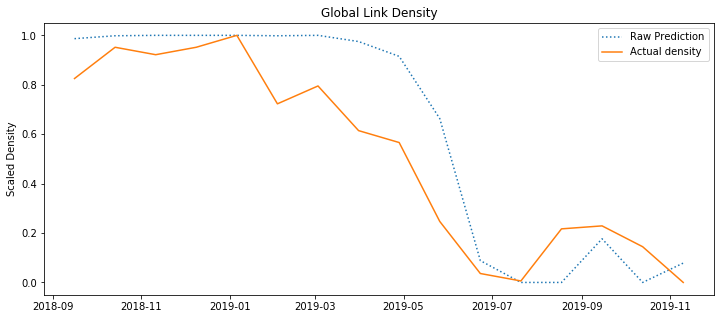

In [388]:
plt.figure(figsize=(12,5))
xaxis = week_slices[0::4][-16:]
plt.plot(xaxis, scale(pred_density), label = "Raw Prediction", linestyle = 'dotted')
# plt.plot(xaxis[1:-1], scale(moving_averages_list), label = "Moving Avg Prediction")
plt.plot(xaxis, scale(real_density), label = "Actual density")
plt.title("Global Link Density")
plt.ylabel("Scaled Density")
plt.legend()

In [370]:
np.sum([[1,2],[3,4]],axis=1)

array([3, 7])

In [371]:
country_num = 12

In [372]:
outd_pred = np.sum(pred_adj[:,country_num,:],axis=1)
ind_pred = np.sum(pred_adj[:,:,country_num],axis=1)
total_link_pred = outd_pred + ind_pred

In [373]:
adj_array = np.array(adj_list)
outd_real = np.sum(adj_array[:,country_num,:]>0,axis=1)
ind_real = np.sum(adj_array[:,:,country_num]>0,axis=1)
total_link_real = outd_real + ind_real

In [374]:
outw_real = np.sum(adj_array[:,country_num,:],axis=1)
inw_real = np.sum(adj_array[:,:,country_num],axis=1)
total_weight_real = outw_real + inw_real

In [375]:
scale(moving_avg(total_link_pred[0:])[1:-1])

array([1.        , 1.        , 1.        , 1.        , 0.99295775,
       0.97887324, 0.87323944, 0.55633803, 0.23239437, 0.        ,
       0.04929577, 0.04929577])

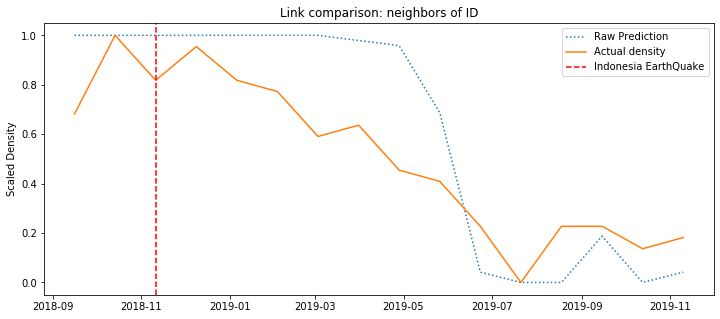

In [384]:
plt.figure(figsize=(12,5))
xaxis = week_slices[0::4][-1*test_interval:]
# plt.plot(xaxis[1:-1], scale(moving_avg(total_link_pred[0:])), label = "Moving Avg Prediction")
plt.plot(xaxis, scale((total_link_pred[0:])), linestyle='dotted',label = "Raw Prediction")
# plt.plot(xaxis[1:-1], scale(moving_avg(total_link_real[-1*test_interval:])), label = "Moving Avg Actual density")
plt.plot(xaxis, scale((total_link_real[-1*test_interval:])), label = "Actual density")
plt.axvline(x=xaxis[-14], linestyle='--', color='red', label="Indonesia EarthQuake")
# plt.axvline(x=xaxis[1], linestyle='dotted', color='purple', label="Maximum gap")
plt.ylabel("Scaled Density")
plt.title("Link comparison: neighbors of "+label_dict[country_num])
# plt.title("Link comparison: egonet of Russia")
plt.legend()

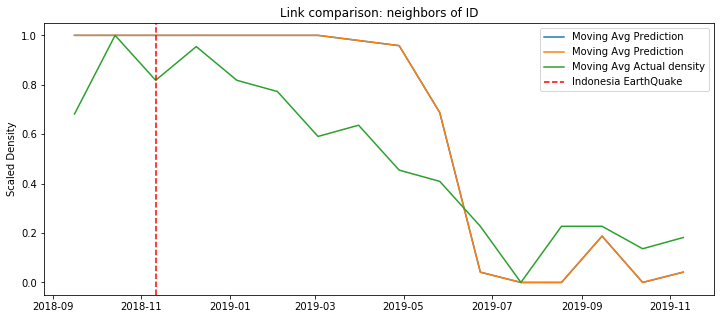

In [385]:
plt.figure(figsize=(12,5))
xaxis = week_slices[0::4][-1*test_interval:]
plt.plot(xaxis, scale((total_link_pred[0:])), label = "Moving Avg Prediction")
plt.plot(xaxis, scale((total_link_pred[0:])), label = "Moving Avg Prediction")
plt.plot(xaxis, scale((total_link_real[-1*test_interval:])), label = "Moving Avg Actual density")
plt.axvline(x=xaxis[-14], linestyle='--', color='red', label="Indonesia EarthQuake")
plt.ylabel("Scaled Density")
plt.title("Link comparison: neighbors of "+label_dict[country_num])
# plt.title("Link comparison: egonet of Russia")
plt.legend()

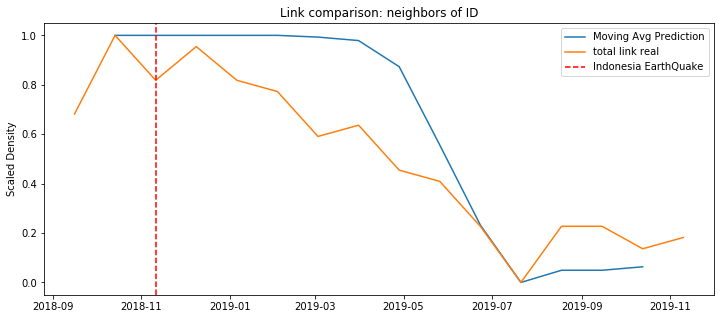

In [389]:
plt.figure(figsize=(12,5))
xaxis = week_slices[0::4][-1*test_interval:]
plt.plot(xaxis[1:-1], scale(moving_avg(total_link_pred[0:])), label = "Moving Avg Prediction")
plt.plot(xaxis, scale((total_link_real[-1*test_interval:])), label = "total link real")
# plt.plot(xaxis, scale((ind_real[-1*test_interval:])), label = "Actual in density", linestyle = "dotted")
# plt.plot(xaxis, scale((outd_real[-1*test_interval:])), label = "Actual out density", linestyle = "dotted")
plt.axvline(x=xaxis[-14], linestyle='--', color='red', label="Indonesia EarthQuake")
plt.ylabel("Scaled Density")
plt.title("Link comparison: neighbors of "+label_dict[country_num])
plt.legend()

In [98]:
predG_list = []
predcoms_list = []
for i in range(len(pred_adj)):
    temp_G = nx.from_numpy_matrix(pred_adj[i], create_using=nx.DiGraph)
    temp_G = nx.relabel_nodes(temp_G, label_dict) 
    predG_list.append(temp_G)
    predcoms_list.append(algorithms.leiden(temp_G, weights='weight'))

In [129]:
realG_list = []
realcoms_list = []
for i in range(len(pred_adj)):
    temp_G = nx.from_numpy_matrix(adj_list[-10+i], create_using=nx.DiGraph)
    temp_G = nx.relabel_nodes(temp_G, label_dict) 
    realG_list.append(temp_G)
    realcoms_list.append(algorithms.leiden(temp_G, weights='weight'))

In [133]:
print(len(predG_list))
print(len(realG_list))

10
10


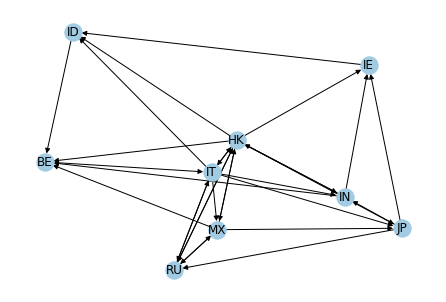

In [138]:
G = nx.ego_graph(predG_list[-3], 'HK')
pos = nx.spring_layout(G)
# colors = range(1)
nx.draw(G, pos, node_color='#A0CBE2', 
        radius = 1,
#         edge_color=colors,
        width=1, edge_cmap=plt.cm.Blues, with_labels=True)
# nx.draw_networkx_labels(G,pos=nx.spring_layout(G))

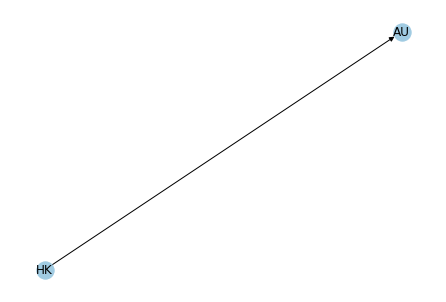

In [139]:
# realG_list[4]
G = nx.ego_graph(realG_list[-3], 'HK')
pos = nx.spring_layout(G)
# colors = range(1)
nx.draw(G, pos, node_color='#A0CBE2', 
#         edge_color=colors,
        width=1, edge_cmap=plt.cm.Blues, with_labels=True)
# nx.draw_networkx_labels(G,pos=nx.spring_layout(G))

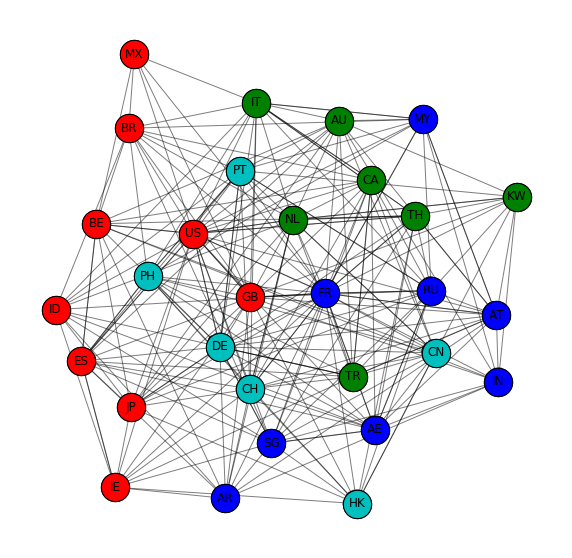

In [45]:
G = predG_list[3]
coms = predcoms_list[3]
pos = nx.kamada_kawai_layout(G)
ego_graph = nx.ego_graph(G, 'HK', radius=2)
viz.plot_network_clusters(G, coms, pos, figsize=(10, 10), plot_labels=True, node_size=800)

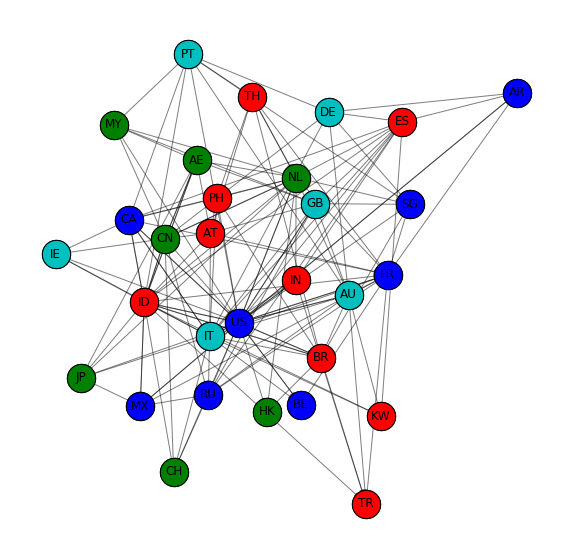

In [28]:
G = realG_list[3]
coms = realcoms_list[3]
pos = nx.kamada_kawai_layout(G)
ego_graph = nx.ego_graph(G, 'HK', radius=2)
viz.plot_network_clusters(G, coms, pos, figsize=(10, 10), plot_labels=True, node_size=800)